In [1]:
pip install bitsandbytes -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00


In [2]:
from huggingface_hub import login
login()

In [4]:
import torch
from transformers import  BitsAndBytesConfig
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    torch_dtype=torch.float16
)
from sentence_transformers import SentenceTransformer
import pandas as pd

embedder = SentenceTransformer("all-mpnet-base-v2")

train_df = pd.read_csv("mistake_identification_train.csv")
train_texts = (train_df["last_student_turn"] + " " + train_df["response"]).tolist()
train_embeddings = embedder.encode(train_texts, normalize_embeddings=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [52]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import Counter

# def retrieve_top_k(val_text, k=3):
#     val_embedding = embedder.encode([val_text], normalize_embeddings=True)
#     similarities = cosine_similarity(val_embedding, train_embeddings)[0]
#     top_idx = np.argsort(similarities)[::-1][:k]
#     return train_df.iloc[top_idx]

from sentence_transformers import CrossEncoder
reranker = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

def retrieve_diverse_examples(test_text, max_candidates=20):
    # embed and retrieve top similar using bi-encoder
    val_embedding = embedder.encode([test_text], normalize_embeddings=True)
    similarities = cosine_similarity(val_embedding, train_embeddings)[0]
    top_idx = np.argsort(similarities)[::-1][:max_candidates]
    candidates = train_df.iloc[top_idx].copy()

    # rerank with cross-encoder
    candidate_pairs = [
        (test_text, row["last_student_turn"] + " " + row["response"])
        for _, row in candidates.iterrows()
    ]
    scores = reranker.predict(candidate_pairs)
    candidates["rerank_score"] = scores
    candidates = candidates.sort_values(by="rerank_score", ascending=False)

    # select diverse examples
    selected = []
    seen_labels = set()
    for _, row in candidates.iterrows():
        label = row["mistake_identification"]
        if label not in seen_labels:
            selected.append(row)
            seen_labels.add(label)
        if len(selected) == 3:
            break

    if selected:
        return pd.DataFrame(selected)
    else:
        return pd.DataFrame()


def generate_response(prompt, max_tokens=5):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            pad_token_id=tokenizer.eos_token_id,
            do_sample=False
        )

    return tokenizer.decode(outputs[0], skip_special_tokens=True).split("Label:")[-1].strip()

def build_prompt(examples, test_student, test_response):
    prompt = """### Task:
        You are an expert tutor evaluator. Label whether the tutor identifies the student's mistake.
        There are 3 possible labels:
        - Yes
        - To some extent
        - No
        Label definitions:
        - Yes: The tutor explicitly identifies the mistake and provides a direct correction or explanation.
        - To some extent: The tutor shows partial awareness of the mistake, such as hinting at it or addressing it indirectly, without a full explanation.
        - No: The tutor does not show any recognition of the mistake or respond in a way that addresses it.
        Avoid choosing "To some extent" unless it is clearly not a full "Yes" or a full "No".
        Provide only the label.
    """

    label_map = {0: "No", 1: "To some extent", 2: "Yes"}
    for i, ex in enumerate(examples):
      label_str = label_map[ex['mistake_identification']]
      prompt += f"###Example {i+1}:\nStudent: {ex['last_student_turn']}\nTutor: {ex['response']}\nLabel: {label_str}\n\n"

    prompt += f"###Now classify:\nStudent: {test_student}\nTutor: {test_response}\nLabel:"
    return prompt


In [53]:
from tqdm import tqdm
val_df = pd.read_csv("mistake_identification_val.csv")

y_true = []
y_pred = []

for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    student = row["last_student_turn"]
    response = row["response"]
    label = row["mistake_identification"]

    test_text = student + " " + response
    # retrieved_examples = retrieve_top_k(test_text, 3)
    retrieved_examples = retrieve_diverse_examples(test_text)

    fewshot_prompt = build_prompt(retrieved_examples.to_dict(orient="records"), student, response)
    pred = generate_response(fewshot_prompt)

    y_true.append(label)
    y_pred.append(pred)
import re

def extract_label(text):
    text = text.strip().lower()
    if "yes" in text:
        return "Yes"
    elif "no" in text:
        return "No"
    elif "to some extent" in text:
        return "To some extent"
    return None


y_pred_cleaned = [extract_label(p) for p in y_pred]

100%|██████████| 493/493 [02:50<00:00,  2.90it/s]


In [54]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

def clean_and_score(y_true, y_pred_raw):
    valid_labels = {"Yes", "No", "To some extent"}
    y_pred_labels = []
    y_true_labels = []

    for yt, yp in zip(y_true, y_pred_raw):
        if yp in valid_labels:
            y_pred_labels.append(yp)
            yt_text = yt if isinstance(yt, str) else {0: "No", 1: "To some extent", 2: "Yes"}.get(yt)
            y_true_labels.append(yt_text)
        else:
            continue

    print(f"Evaluated {len(y_pred_labels)} / {len(y_true)} examples")
    df_preds = pd.DataFrame({
        "true_label": y_true_labels,
        "predicted_label": y_pred_labels
    })

    df_preds.to_csv("y_pred_mistral_baseline.csv", index=False)

    report = classification_report(
        y_true_labels,
        y_pred_labels,
        digits=3,
        zero_division=0
    )

    return report
report = clean_and_score(y_true, y_pred_cleaned)
print(report)

Evaluated 493 / 493 examples
                precision    recall  f1-score   support

            No      0.477     0.425     0.449        73
To some extent      0.081     0.258     0.123        31
           Yes      0.854     0.722     0.783       389

      accuracy                          0.649       493
     macro avg      0.471     0.468     0.452       493
  weighted avg      0.750     0.649     0.692       493



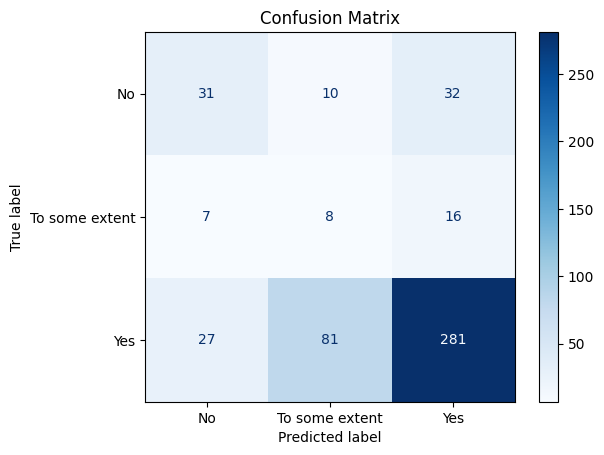

In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label_map = {"No": 0, "To some extent": 1, "Yes": 2}
label_names = ["No", "To some extent", "Yes"]
# Clean and align predictions and true labels
cleaned_y_pred = []
cleaned_y_true = []

for pred, true in zip(y_pred_cleaned, y_true):
    if pred is not None:
        cleaned_y_pred.append(label_map[pred])
        cleaned_y_true.append(true)

# Compute and plot the confusion matrix
cm = confusion_matrix(cleaned_y_true, cleaned_y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
